In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder



In [2]:

# Read the CSV file
df = pd.read_csv(r"C:\Users\hp\Desktop\LEARNING\COLLEGE WORK\DS\Book1.csv")  # Replace with your actual file path

# Display the first few rows
print(df.head())


  Name Gender  Maths_score  Reading_score  Writing_Score  Placement_Score  \
0  ABC      M         61.0           76.0             72               75   
1  ABD      F         73.0           80.0             67               79   
2  ABE      M         80.0           83.0             65               82   
3  ABR      F         67.0           81.0             60               90   
4  BCA      F          NaN           83.0             80               75   

   Club_Join_Date  Placement_offer_Count  
0            2018                      1  
1            2021                      1  
2            2019                      2  
3            2021                      3  
4            2021                      1  


In [3]:
missing_values = df.isnull()
print(missing_values)

     Name  Gender  Maths_score  Reading_score  Writing_Score  Placement_Score  \
0   False   False        False          False          False            False   
1   False   False        False          False          False            False   
2   False   False        False          False          False            False   
3   False   False        False          False          False            False   
4   False   False         True          False          False            False   
5   False   False        False          False          False            False   
6   False   False        False           True          False            False   
7   False   False        False          False          False            False   
8   False   False        False          False          False            False   
9   False   False        False          False          False            False   
10  False   False        False          False          False            False   
11  False   False        Fal

In [4]:
name = df.notnull()
print(name)
le =LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
print(df.head())




    Name  Gender  Maths_score  Reading_score  Writing_Score  Placement_Score  \
0   True    True         True           True           True             True   
1   True    True         True           True           True             True   
2   True    True         True           True           True             True   
3   True    True         True           True           True             True   
4   True    True        False           True           True             True   
5   True    True         True           True           True             True   
6   True    True         True          False           True             True   
7   True    True         True           True           True             True   
8   True    True         True           True           True             True   
9   True    True         True           True           True             True   
10  True    True         True           True           True             True   
11  True    True         True           

In [5]:
print(df.isnull().sum()) 
# df.fillna(0, inplace=True)

# # Verify that all missing values are replaced
# print(df.isnull().sum())  # Should print all zeros





Name                     0
Gender                   0
Maths_score              1
Reading_score            1
Writing_Score            0
Placement_Score          0
Club_Join_Date           0
Placement_offer_Count    0
dtype: int64


In [7]:
# df.fillna(0, inplace=True)

# #Verify that all missing values are replaced
# print(df.isnull().sum())  # Should print all zeros


Name                     0
Gender                   0
Maths_score              0
Reading_score            0
Writing_Score            0
Placement_Score          0
Club_Join_Date           0
Placement_offer_Count    0
dtype: int64


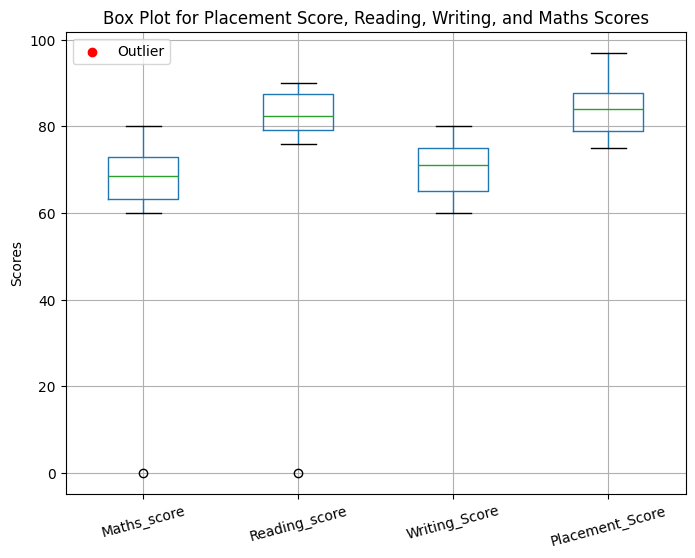

In [11]:
columns_to_check = ['Maths_score', 'Reading_score', 'Writing_Score', 'Placement_Score']
outliers_dict = {}

# Detect outliers using Min-Max theorem
for col in columns_to_check:
    min_value = df[col].min()
    max_value = df[col].max()
    
    # Define outlier threshold using Min-Max method
    threshold = 1.5 * (max_value - min_value)
    lower_bound = min_value - threshold
    upper_bound = max_value + threshold
    
    # Find outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Store outliers
    outliers_dict[col] = outliers.tolist()
    

# Box Plot with Outliers
plt.figure(figsize=(8, 6))
df[columns_to_check].boxplot()

# Highlight outliers in red
for col in columns_to_check:
    plt.scatter(
        [columns_to_check.index(col) + 1] * len(outliers_dict[col]), 
        outliers_dict[col], 
        color='red', 
        label="Outlier" if col == columns_to_check[0] else ""
    )

plt.title("Box Plot for Placement Score, Reading, Writing, and Maths Scores")
plt.ylabel("Scores")
plt.xticks(ticks=range(1, len(columns_to_check) + 1), labels=columns_to_check, rotation=15)
plt.legend()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2844\446764728.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_2844\446764728.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

Updated DataFrame with NaN replaced by non-outlier median:
   Name  Gender  Maths_score  Reading_score  Writing_Score  Placement_Score  \
0   ABC       1         61.0           76.0             72               75   
1   ABD       0         73.0           80.0             67               79   
2   ABE       1         80.0           83.0             65               82   
3   ABR       0         67.0           81.0             60               90   
4   BCA       0          0.0           83.0             80               75   
5   BCS       0         60.0           85.0             61               97   
6   BCF       1         72.0            0.0             79               88   
7   BCE       0         73.0           78.0             63               87   
8   BVT       1         64.0           88.0             78               95   
9   ANI       0         71.0           79.0             62               84   
10  ANK       1         75.0           82.0             80              

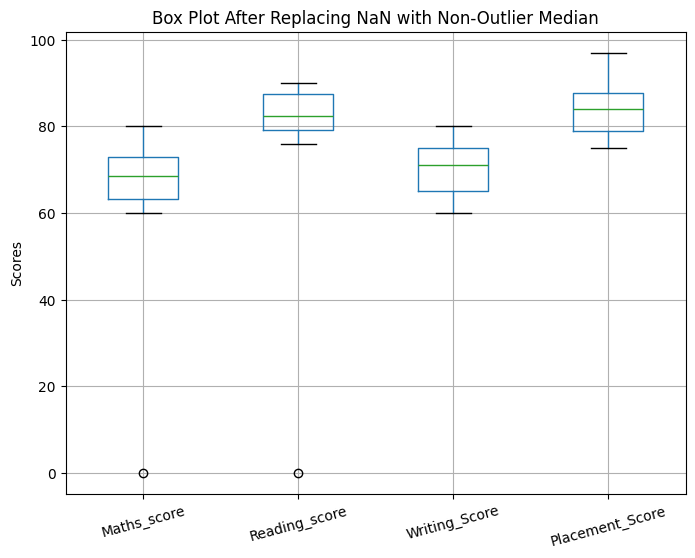

In [12]:
columns_to_check = ['Maths_score', 'Reading_score', 'Writing_Score', 'Placement_Score']

# Function to replace NaN with non-outlier median
def replace_nan_with_non_outlier_median(df, columns):
    for col in columns:
        min_value = df[col].min()
        max_value = df[col].max()
        
        # Min-Max outlier threshold
        threshold = 1.5 * (max_value - min_value)
        lower_bound = min_value - threshold
        upper_bound = max_value + threshold
        
        # Identify non-outlier values
        non_outliers = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]
        
        # Compute median of non-outlier values
        median_value = non_outliers.median()
        
        # Replace NaN values with this median
        df[col].fillna(median_value, inplace=True)
    
    return df

# Replace NaN with non-outlier median
df = replace_nan_with_non_outlier_median(df, columns_to_check)

# Print updated DataFrame
print("Updated DataFrame with NaN replaced by non-outlier median:")
print(df)

# Box Plot to visualize data after replacement
plt.figure(figsize=(8, 6))
df[columns_to_check].boxplot()
plt.title("Box Plot After Replacing NaN with Non-Outlier Median")
plt.ylabel("Scores")
plt.xticks(rotation=15)
plt.show()